In [1]:
# PROTOTYPE Code for energy reconstruction using AERA's double gaussian
# Ready to read simulations from CORSIKA/Coreas
# using the grand official package
# Date: April 08, 2020

# Written by Bruno L. Lago

In [2]:
from modERec import EnergyRec
import numpy as np

* EnergyRec default values summary:
--> bool_plot =  False
--> bool_EarlyLate =  True
--> nu_low =  50
--> nu_high =  200
--> SNR_thres =  10
--> thres_low =  1e-07
--> thres_high =  1
--> f_thres =  0.01




# Training stage

This block loops over a given set of simulations and writes the shower plane fluences and antenna positions to a file.

In [3]:
!rm bestfit.out
!rm fluences_all.out

EnergyRec.bool_EarlyLate = True
EnergyRec.bool_plot = False
for i in range(100001,100021):
    sim_dir = '/mnt/d/Pesquisa/GRAND/simulation/chuv_estrela/80deg/sim' + str(i)
    rec1 = EnergyRec(sim_dir)

    fluences_file = open("fluences_all.out",'a')
    for ant in rec1.antenna:
        fluence = ant.fluence/(ant.wEarlyLate**2)
        if(fluence>rec1.f_thres):
            x = (ant.r_proj[0] - rec1.shower.r_Core_proj[0])*ant.wEarlyLate
            y = (ant.r_proj[1] - rec1.shower.r_Core_proj[1])*ant.wEarlyLate
            sigma_f = ant.sigma_f/(ant.wEarlyLate**2)
            print(ant.ID, x, y, fluence, sigma_f, file=fluences_file)

    fluences_file.close()

rm: cannot remove 'bestfit.out': No such file or directory
rm: cannot remove 'fluences_all.out': No such file or directory


###  Determination of the $C$ parameters

The double gaussian parametrization has a set of parameters $C$ to be determined. In this block, these paramaters are fit to all the simulations at once.
This end the training stage.

In [4]:
rec1 = EnergyRec("fluences_all.out")
Cs =rec1.bestfit[2:7]

* Model fit:
--> Done!




# $S_{radio}$ determination

With the $C$ parameters determined, a new fit is performed in order to determine $A$ and $\sigma$ for each simulation and obtain the $S_{radio}$ to be related with the cosmic ray energy.

In [5]:
!rm bestfit.out
for i in range(100001,100021):
    sim_dir = '/mnt/d/Pesquisa/GRAND/simulation/chuv_estrela/80deg/sim' + str(i)
    rec1 = EnergyRec(sim_dir)
    rec1.bool_EarlyLate = True
    rec1.model_fit("",Cs)

rm: cannot remove 'bestfit.out': No such file or directory
* Model fit:
--> Early-late correction will be applied!
--> Done!


* Model fit:
--> Early-late correction will be applied!
--> Done!


* Model fit:
--> Early-late correction will be applied!
--> Done!


* Model fit:
--> Early-late correction will be applied!
--> Done!


* Model fit:
--> Early-late correction will be applied!
--> Done!


* Model fit:
--> Early-late correction will be applied!
--> Done!


* Model fit:
--> Early-late correction will be applied!
--> Done!


* Model fit:
--> Early-late correction will be applied!
--> Done!


* Model fit:
--> Early-late correction will be applied!
--> Done!


* Model fit:
--> Early-late correction will be applied!
--> Done!


* Model fit:
--> Early-late correction will be applied!
--> Done!


* Model fit:
--> Early-late correction will be applied!
--> Done!


* Model fit:
--> Early-late correction will be applied!
--> Done!


* Model fit:
--> Early-late correction will be applied!
-

Text(0, 0.5, '#')

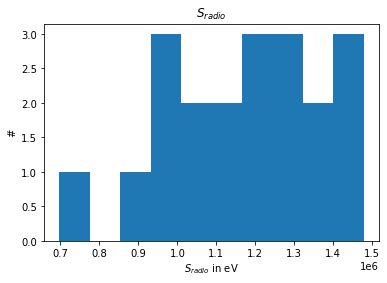

In [6]:
import matplotlib.pyplot as plt
S_radio = np.loadtxt("bestfit.out")[:,-1]
plt.hist(S_radio)

plt.title(r'$S_{radio}$')
plt.xlabel(r'$S_{radio}$ in eV')
plt.ylabel('#')

# Plot the resulting fit and data

This block plots all the simulations in a single graph for illustrative purposes.

In [7]:
!rm fluence_mean_std.out

antpos_fluences = np.loadtxt("fluences_all.out")
x_proj, y_proj, fluence_arr, sigma_arr = EnergyRec.eval_mean_fluences(antpos_fluences)
ID = range(len(x_proj))
output = np.c_[ID,x_proj, y_proj, fluence_arr, sigma_arr]

f_mean_std = open('fluence_mean_std.out','w')
for line in output:
    print(*line,file=f_mean_std)
f_mean_std.close()

rec1 = EnergyRec("fluence_mean_std.out")
rec1.model_fit("fluence_mean_std.out",Cs)

* Model fit:
--> Done!


* Model fit:
--> Done!




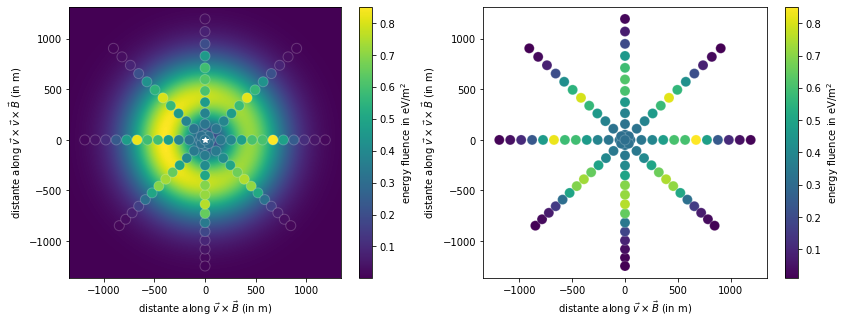

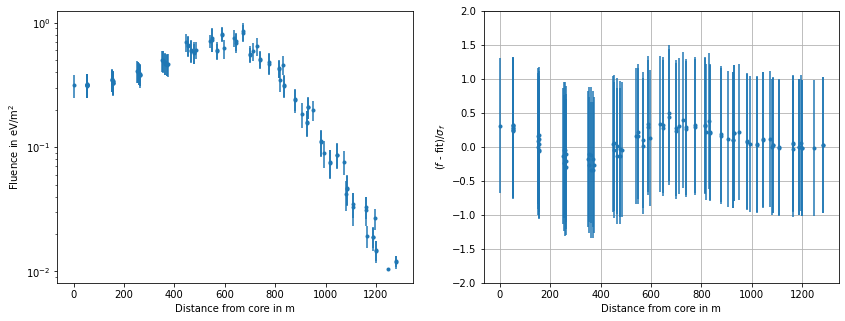

In [8]:
rec1.AERA.aeraPlot(rec1)